# 1. Exploratory data analysis

In [ ]:
# Importing findspark module to locate and initialize Spark
import findspark

# Setting the path to the Spark installation directory
path = "/home/alumno/Escritorio/spark/spark-3.2.2-bin-hadoop2.7"

# Initializing Spark using findspark
findspark.init(path)

# Importing necessary modules from PySpark
from pyspark import SparkContext, SparkConf

# Creating a SparkConf object and setting the application name and master URL
conf = SparkConf().setAppName("intro").setMaster("local")

# Creating a SparkContext object using the SparkConf object
sc = SparkContext(conf=conf)

# Importing SparkSession from PySpark SQL module
from pyspark.sql import SparkSession

# Creating a SparkSession object using the SparkContext object
spark = SparkSession(sc)

In [ ]:
# Read the housing data from a CSV file
housing_csv = "/home/alumno/Escritorio/spark/SparkLab2/housing/housing_all.csv"
housingDF = spark.read.option("header", True).csv(housing_csv, inferSchema=True)

# Print the schema of the housing dataframe
housingDF.printSchema()

# Calculate the total number of rows in the housing dataframe
total = housingDF.count()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: integer (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemod/Add: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |

# 2. Plotting summary data views using Pandas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

pandasDF = housingDF.toPandas()

<Figure size 2160x2160 with 0 Axes>

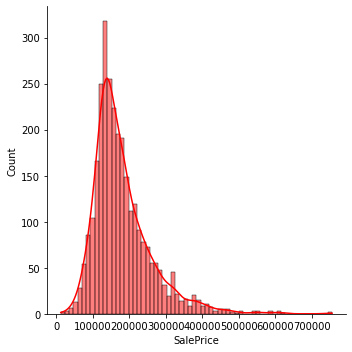

In [ ]:
# Create a figure with a larger size
plt.figure(figsize=(30, 30))

# Plot a histogram of the 'SalePrice' column from the pandasDF dataframe
sns.displot(data=pandasDF['SalePrice'], kde=True, color='red')

# Display the plot
plt.show()

<Axes: xlabel='SaleCondition', ylabel='Frequency'>

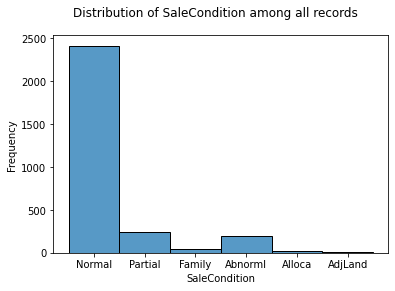

In [ ]:
# Set the title of the plot
plt.suptitle(f'Distribution of SaleCondition among all records')

# Set the label for the y-axis
plt.ylabel("Frequency")

# Plot the histogram of the 'SaleCondition' column from the pandasDF dataframe
sns.histplot(pandasDF['SaleCondition'])

In [ ]:
# Importing the necessary function from the pyspark.sql.functions module
from pyspark.sql.functions import round

# Using the describe() method on the pandasDF dataframe to compute summary statistics
# for the columns 'MSSubClass', 'PoolArea', and 'YearBuilt'
# The round() function is used to round the summary statistics to 2 decimal places
pandasDF[['MSSubClass', 'PoolArea', 'YearBuilt']].describe().round(2)

,MSSubClass,PoolArea,YearBuilt
count,2930.00,2930.00,2930.00
mean,57.39,2.24,1971.36
std,42.64,35.60,30.25
min,20.00,0.00,1872.00
25%,20.00,0.00,1954.00
50%,50.00,0.00,1973.00
75%,70.00,0.00,2001.00
max,190.00,800.00,2010.00


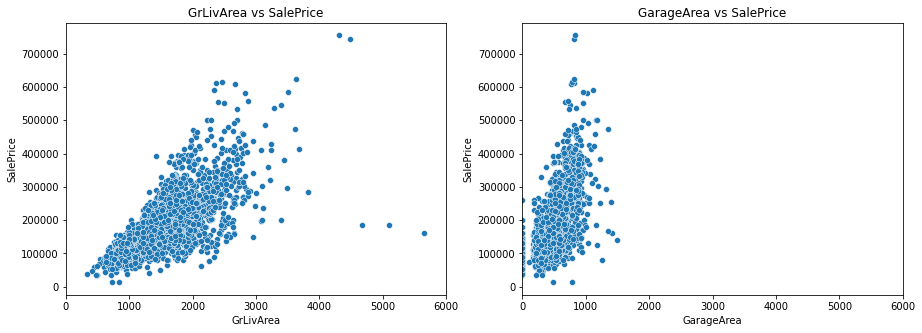

In [ ]:
# Create a figure with two subplots
fig1, axes = plt.subplots(1, 2, sharex=True, figsize=(15, 5))

# Set the x-axis limits for the first subplot
axes[0].set_xlim(0, 6000)

# Plot a scatter plot of 'GrLivArea' vs 'SalePrice' in the first subplot
sns.scatterplot(data=pandasDF, ax=axes[0], x="GrLivArea", y="SalePrice")
axes[0].set_title("GrLivArea vs SalePrice")

# Plot a scatter plot of 'GarageArea' vs 'SalePrice' in the second subplot
sns.scatterplot(data=pandasDF, ax=axes[1], x="GarageArea", y="SalePrice")
axes[1].set_title("GarageArea vs SalePrice")

<Axes: title={'center': 'GrvLivArea vs SalePrice'}, xlabel='GrLivArea', ylabel='SalePrice'>

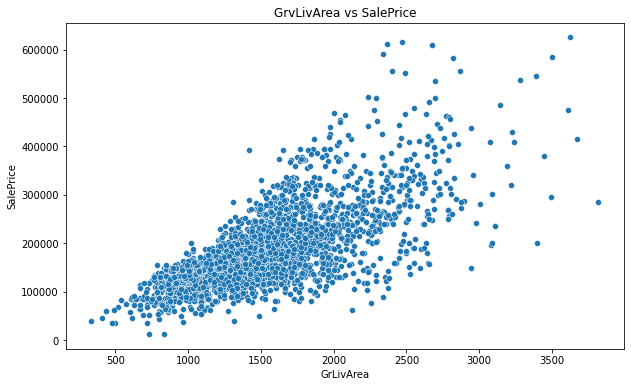

In [ ]:
# Filter the pandasDF dataframe based on conditions for 'GrLivArea' and 'SalePrice'
# Keep only the rows where 'GrLivArea' is less than 4000 and 'SalePrice' is less than 7000000
pandasDF2 = pandasDF.loc[(pandasDF["GrLivArea"] < 4000) &
                         (pandasDF["SalePrice"] < 7000000)]

# Create a new figure with a size of 10x6
fig2 = plt.figure(figsize=(10,6))

# Add a subplot to the figure
axes = fig2.add_subplot()

# Set the title of the plot
axes.set_title("GrvLivArea vs SalePrice")

# Create a scatter plot of 'GrLivArea' vs 'SalePrice' using the filtered pandasDF2 dataframe
sns.scatterplot(data=pandasDF2, ax=axes, x="GrLivArea", y="SalePrice")

**Exercise 1**

> *Create similar scatter-plots for TotalBsmtSF vs SalePrice and 1stFlrSF vs SalePrice.*

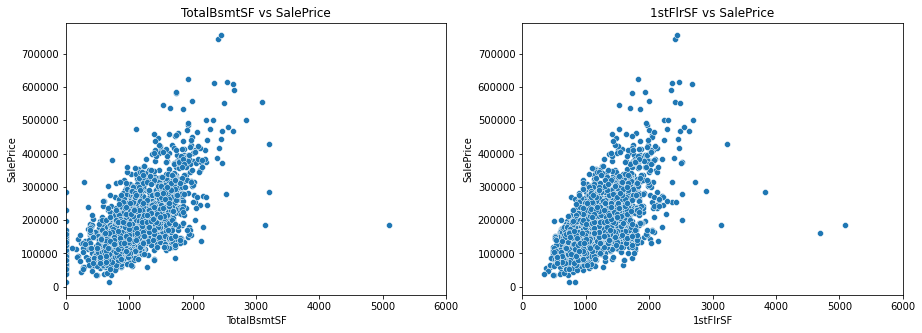

In [ ]:
# Create a figure with two subplots
fig1, axes = plt.subplots(1, 2, sharex=True, figsize=(15, 5))

# Set the x-axis limits for the first subplot
axes[0].set_xlim(0, 6000)

# Plot a scatter plot of 'TotalBsmtSF' vs 'SalePrice' in the first subplot
sns.scatterplot(data=pandasDF, ax=axes[0], x="TotalBsmtSF", y="SalePrice")
axes[0].set_title("TotalBsmtSF vs SalePrice")

# Plot a scatter plot of '1stFlrSF' vs 'SalePrice' in the second subplot
sns.scatterplot(data=pandasDF, ax=axes[1], x="1stFlrSF", y="SalePrice")
axes[1].set_title("1stFlrSF vs SalePrice")

**Exercise 2**
> *Do you see any outliers from GarageArea vs SalePrice? Can you remove them?*

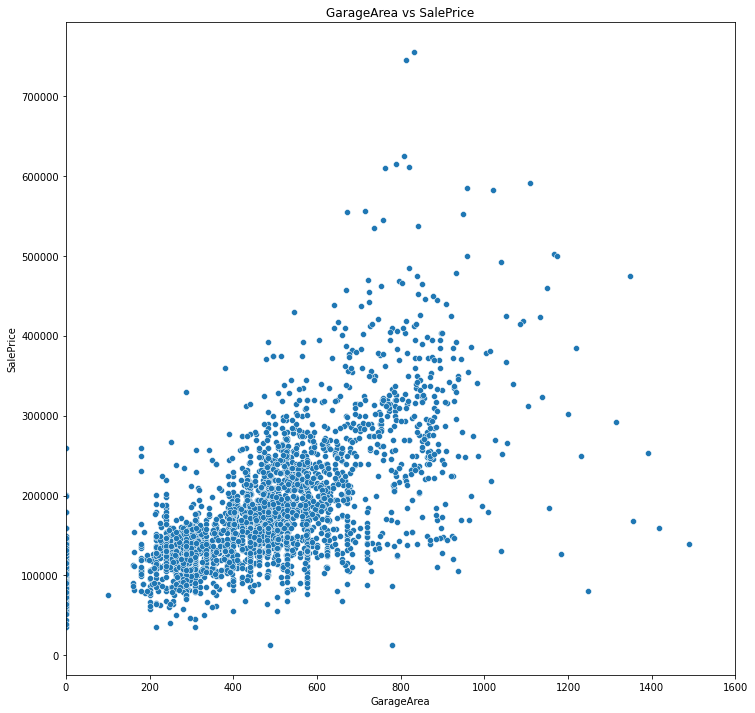

In [ ]:
# Create a new figure with a size of 12x12
fig = plt.figure(figsize=(12,12))

# Add a subplot to the figure
axes = fig.add_subplot()

# Set the x-axis limits for the subplot
axes.set_xlim(0,1600)

# Plot a scatter plot of 'GarageArea' vs 'SalePrice' using the pandasDF dataframe
sns.scatterplot(data=pandasDF, ax=axes, x="GarageArea", y="SalePrice")

# Set the title of the plot
axes.set_title("GarageArea vs SalePrice")

To handle outliers in our dataset, we'll calculate the 5th and 95th percentiles to set our lower and upper limits. Any data points that lie outside these boundaries will be removed. This method focuses on the central 90% of our data, getting rid of extreme values that might skew our analysis. It's a practical step to make sure our data is more consistent and dependable for whatever analysis we plan to do next.

In [ ]:
# Calculate the 95th and 5th percentiles of the 'GarageArea' column
low_pass_GArea = pandasDF['GarageArea'].quantile(0.95)
high_pass_GArea = pandasDF['GarageArea'].quantile(0.05)

# Calculate the 95th and 5th percentiles of the 'SalePrice' column
low_pass_SalesPrice = pandasDF['SalePrice'].quantile(0.95)
high_pass_SalesPrice = pandasDF['SalePrice'].quantile(0.05)

# Filter the pandasDF dataframe based on the calculated percentiles
# Keep only the rows where 'GarageArea' is between the high and low pass values
# and 'SalePrice' is between the high and low pass values
exercise2 = pandasDF.loc[((pandasDF["GarageArea"] > high_pass_GArea) &
                          (pandasDF['GarageArea'] < low_pass_GArea) &
                          (pandasDF["SalePrice"] > high_pass_SalesPrice) &
                          (pandasDF['SalePrice'] < low_pass_SalesPrice))]

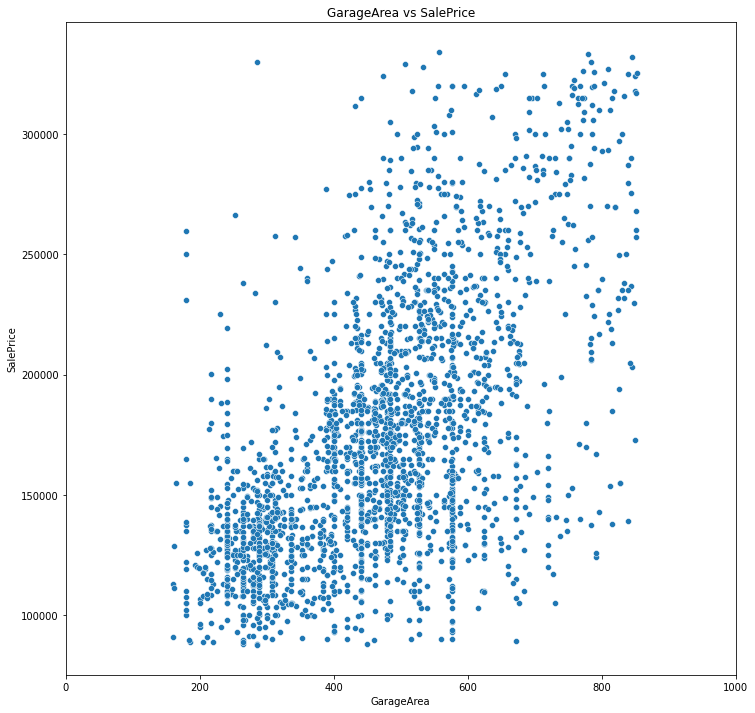

In [ ]:
# Create a new figure with a size of 12x12
fig = plt.figure(figsize=(12,12))

# Add a subplot to the figure
axes = fig.add_subplot()

# Set the x-axis limits for the subplot
axes.set_xlim(0,1000)

# Plot a scatter plot of 'GarageArea' vs 'SalePrice' using the exercise2 dataframe
sns.scatterplot(data=exercise2, ax=axes, x="GarageArea", y="SalePrice")

# Set the title of the plot
axes.set_title("GarageArea vs SalePrice")

# 3. Model training

In [ ]:
# Identify columns with missing values
naCols = pandasDF.columns[pandasDF.isna().any()].tolist()

# Create a new dataframe with columns that do not have missing values
curatedDF = housingDF[[i for i in pandasDF if i not in naCols]]

# Print the number of columns in the original dataframe and the curated dataframe
print(len(pandasDF.columns), len(curatedDF.columns))

81 60


In [ ]:
# Selecting only the numerical columns from the curatedDF dataframe
numCols = [col for col, dtype in curatedDF.dtypes if dtype != 'string']

# Creating a new dataframe, indexedDF, by selecting only the numerical columns from curatedDF
indexedDF = curatedDF.select(numCols)

# Getting the number of columns in the indexedDF dataframe
len(indexedDF.columns)

27

In [ ]:
# Train & Validation Split
(trainDF, validationDF) = indexedDF.randomSplit([0.8, 0.2], seed=1)

In [ ]:
# Importing the VectorAssembler module from pyspark.ml.feature
from pyspark.ml.feature import VectorAssembler

# Creating a VectorAssembler object with the input columns as all columns in trainDF except "SalePrice"
# and the output column as "features"
vecAssembler = VectorAssembler(inputCols=trainDF.drop("SalePrice").columns, outputCol="features")

# Transforming the trainDF dataframe using the vecAssembler to obtain the features column
vecTrainDF = vecAssembler.transform(trainDF)

In [ ]:
# Importing the StandardScaler module from pyspark.ml.feature
from pyspark.ml.feature import StandardScaler

# Creating a StandardScaler object with the input column as "features" and the output column as "scaledFeatures"
# Setting withStd=True to scale the features to have unit standard deviation
# Setting withMean=False to center the features around zero mean
scaler = StandardScaler(inputCol="features",
                        outputCol="scaledFeatures",
                        withStd=True,
                        withMean=False)

# Fitting the StandardScaler model on the vecTrainDF dataframe to compute the scaling parameters
scalerModel = scaler.fit(vecTrainDF)

# Transforming the vecTrainDF dataframe using the scalerModel to obtain the scaled features
scTrainDF = scalerModel.transform(vecTrainDF)

In [ ]:
from pyspark.ml.regression import LinearRegression

lr = (LinearRegression(featuresCol="features",
                       labelCol="SalePrice",
                       maxIter=10,
                       regParam=0.8,
                       elasticNetParam=0.1,
                      )
     )
lrModel = lr.fit(scTrainDF)

In [ ]:
# Importing the Pipeline module from pyspark.ml
from pyspark.ml import Pipeline

# Creating a Pipeline object with the stages as vecAssembler, scaler, and lr
pipeline=Pipeline(stages=[vecAssembler, scaler, lr])
# Fitting the pipeline on the trainDF dataframe
pipelineModel=pipeline.fit(trainDF)
# Transforming the validationDF dataframe using the pipelineModel to obtain the predictions
predDF=pipelineModel.transform(validationDF)
predDF.select("prediction","SalePrice","features").show(5)

+------------------+---------+--------------------+
|        prediction|SalePrice|            features|
+------------------+---------+--------------------+
| 171226.3878128864|   189900|[5.0,60.0,13830.0...|
|217597.44293511054|   171500|[14.0,20.0,10176....|
| 245581.5256090504|   212000|[15.0,120.0,6820....|
| 405269.6523967001|   538000|[16.0,60.0,53504....|
| 326596.1590501906|   394432|[18.0,20.0,11394....|
+------------------+---------+--------------------+
only showing top 5 rows



# 4. Quality evaluation of model with R-square metrics

In [ ]:
# Importing the RegressionEvaluator module from pyspark.ml.evaluation
from pyspark.ml.evaluation import RegressionEvaluator

# Creating a RegressionEvaluator object with the prediction column as "prediction",
# the label column as "SalePrice", and the metric name as "r2"
lrEvaluator = RegressionEvaluator(predictionCol="prediction",
                                  labelCol="SalePrice",
                                  metricName="r2")

# Evaluating the r2 metric on the predDF dataframe using the lrEvaluator
r2 = lrEvaluator.evaluate(predDF)

# Getting the summary statistics of the lrModel
lrSummary = lrModel.summary

# Printing the root mean squared error (RMSE) from the lrSummary
print(f"RMSE: {lrSummary.rootMeanSquaredError:f}")

# Printing the r2 value from the lrSummary
print(f"r2: {lrSummary.r2:f}")

# Transforming the validationDF dataframe using the pipelineModel to obtain the lrPredictions
lrPredictions = pipelineModel.transform(validationDF)

# Selecting the "prediction", "SalePrice", and "features" columns from the lrPredictions dataframe and displaying the first 5 rows
lrPredictions.select("prediction","SalePrice","features").show(5)

# Evaluating the R Squared (R2) metric on the lrPredictions dataframe using the lrEvaluator
print(f"R Squared (R2) on val data = {lrEvaluator.evaluate(lrPredictions):g}")

RMSE: 32114.598852
r2: 0.833536
+------------------+---------+--------------------+
|        prediction|SalePrice|            features|
+------------------+---------+--------------------+
| 171226.3878128864|   189900|[5.0,60.0,13830.0...|
|217597.44293511054|   171500|[14.0,20.0,10176....|
| 245581.5256090504|   212000|[15.0,120.0,6820....|
| 405269.6523967001|   538000|[16.0,60.0,53504....|
| 326596.1590501906|   394432|[18.0,20.0,11394....|
+------------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on val data = 0.704586


# 5. Random Forest regression model and quality evaluation

In [ ]:
# Importing the RandomForestRegressor module from pyspark.ml.regression
from pyspark.ml.regression import RandomForestRegressor

# Creating a RandomForestRegressor object with the features column as 'features',
# the label column as 'SalePrice', and setting the hyperparameters
rf = RandomForestRegressor(featuresCol='features',
                           labelCol='SalePrice',
                           maxDepth=30,
                           minInstancesPerNode=2,
                           bootstrap=True)

# Creating a Pipeline object with the stages as vecAssembler and rf
pipeline = Pipeline(stages=[vecAssembler, rf])

# Fitting the pipeline on the trainDF dataframe
pipelineModel = pipeline.fit(trainDF)

# Transforming the validationDF dataframe using the pipelineModel to obtain the predictions
predDF = pipelineModel.transform(validationDF)

# Selecting the "prediction", "SalePrice", and "features" columns from the predDF dataframe and displaying the first 5 rows
predDF.select("prediction", "SalePrice", "features").show(5)

+------------------+---------+--------------------+
|        prediction|SalePrice|            features|
+------------------+---------+--------------------+
| 189865.8333333333|   189900|[5.0,60.0,13830.0...|
|196510.94166666668|   171500|[14.0,20.0,10176....|
|       208748.6625|   212000|[15.0,120.0,6820....|
|437306.75666666665|   538000|[16.0,60.0,53504....|
|343887.43333333335|   394432|[18.0,20.0,11394....|
+------------------+---------+--------------------+
only showing top 5 rows



In [ ]:
# Create a RegressionEvaluator object with the prediction column as "prediction",
# the label column as "SalePrice", and the metric name as "r2"
rfEvaluator = RegressionEvaluator(
    predictionCol="prediction",
    labelCol="SalePrice",
    metricName="r2",
)

The R-squared (R²) value is really useful in understanding how well our model is working. It shows how much of the change in our prediction column can be explained by the changes in our features column. In simpler terms, a higher R² means that our model does a better job of explaining what's going on with the data we're looking at. So, when we see a high R² value, it's a good sign that our model is doing well and making sense of the data effectively.

**Exercise 3:**
    
> *• load input airbnb data to estimate the price of a room from any combination of numerical columns like bedrooms, bathrooms, reviews, ...*

> *• create two models with LinearRegression and RandomForestRegressor*

> *• compare qualities of both methods*

In [ ]:
!pip install fastparquet

In [ ]:
import pandas as pd

airbnbDF = spark.read.parquet("/home/alumno/Descargas/airbnb.parquet")

In [ ]:
# Display the first row of the airbnbDF dataframe
airbnbDF.show(n=1, truncate=False, vertical=True)

-RECORD 0------------------------------------------
 host_is_superhost              | t                
 cancellation_policy            | moderate         
 instant_bookable               | t                
 host_total_listings_count      | 1.0              
 neighbourhood_cleansed         | Western Addition 
 latitude                       | 37.76931         
 longitude                      | -122.43386       
 property_type                  | Apartment        
 room_type                      | Entire home/apt  
 accommodates                   | 3.0              
 bathrooms                      | 1.0              
 bedrooms                       | 1.0              
 beds                           | 2.0              
 bed_type                       | Real Bed         
 minimum_nights                 | 1.0              
 number_of_reviews              | 180.0            
 review_scores_rating           | 97.0             
 review_scores_accuracy         | 10.0             
 review_scor

In [ ]:
airbnb_pandasDF = airbnbDF.toPandas()

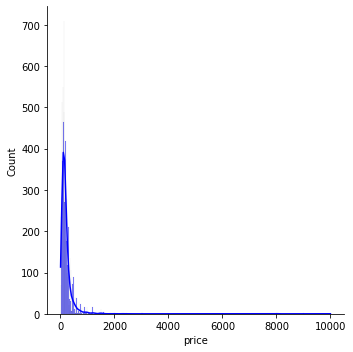

In [ ]:
# Plot a histogram of the 'price' column from the airbnb_pandasDF dataframe
sns.displot(data = airbnb_pandasDF["price"], kde = True, color = "blue")

*Data processing*

In [ ]:
# Identify columns with missing values
naCols = airbnb_pandasDF.columns[airbnb_pandasDF.isna().any()].tolist()

# Create a new dataframe with columns that do not have missing values
curatedDF = airbnbDF[[i for i in airbnb_pandasDF if i not in naCols]]

# Print the number of columns in the original dataframe
print(len(airbnb_pandasDF.columns))

# Print the number of columns in the curated dataframe
print(len(curatedDF.columns))

34
34


In [ ]:
# Identify columns with all zero values
zeroCols = airbnb_pandasDF.columns[(airbnb_pandasDF == 0).all()].tolist()

# Create a new dataframe with columns that do not have all zero values
curatedDF = airbnbDF[[i for i in airbnbDF if i not in zeroCols]]

# Print the number of columns in the original dataframe
print(len(airbnbDF.columns))

# Print the number of columns in the curated dataframe
print(len(curatedDF.columns))

34
34


In [ ]:
# Selecting only the numerical columns from the curatedDF dataframe
numCols = [col for col, dtype in curatedDF.dtypes if dtype != 'string']

# Creating a new dataframe, indexedDF, by selecting only the numerical columns from curatedDF
indexedDF = curatedDF.select(numCols)

# Getting the number of columns in the indexedDF dataframe
len(indexedDF.columns)

27

In [ ]:
# Display the first row of the indexedDF dataframe
indexedDF.show(n=1, truncate=False, vertical=True)

-RECORD 0------------------------------------
 host_total_listings_count      | 1.0        
 latitude                       | 37.76931   
 longitude                      | -122.43386 
 accommodates                   | 3.0        
 bathrooms                      | 1.0        
 bedrooms                       | 1.0        
 beds                           | 2.0        
 minimum_nights                 | 1.0        
 number_of_reviews              | 180.0      
 review_scores_rating           | 97.0       
 review_scores_accuracy         | 10.0       
 review_scores_cleanliness      | 10.0       
 review_scores_checkin          | 10.0       
 review_scores_communication    | 10.0       
 review_scores_location         | 10.0       
 review_scores_value            | 10.0       
 price                          | 170.0      
 bedrooms_na                    | 0.0        
 bathrooms_na                   | 0.0        
 beds_na                        | 0.0        
 review_scores_rating_na        | 

In [ ]:
# Train & Validation Split
(trainDF, validationDF) = indexedDF.randomSplit([0.8, 0.2], seed = 1)

In [ ]:
# Create a VectorAssembler object with the input columns as all columns in trainDF except "price"
# and the output column as "features"
vecAssembler = VectorAssembler(inputCols=trainDF.drop("price").columns, outputCol="features")

# Transform the trainDF dataframe using the vecAssembler to obtain the features column
vecTrainDF = vecAssembler.transform(trainDF)

In [ ]:
# Create a StandardScaler object with the input column as "features" and the output column as "scaledFeatures"
# Setting withStd=True to scale the features to have unit standard deviation
# Setting withMean=False to center the features around zero mean
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)

# Fit the StandardScaler model on the vecTrainDF dataframe to compute the scaling parameters
scalerModel = scaler.fit(vecTrainDF)

# Transform the vecTrainDF dataframe using the scalerModel to obtain the scaled features
scTrainDF = scalerModel.transform(vecTrainDF)

*Linear Regression*

In [ ]:
# Create a LinearRegression object with the features column as "features",
# the label column as "price", and set the hyperparameters
lr = LinearRegression(featuresCol="features",
                      labelCol="price",
                      maxIter=10,
                      regParam=0.8,
                      elasticNetParam=0.1)

# Fit the LinearRegression model on the scTrainDF dataframe
lrModel = lr.fit(scTrainDF)

In [ ]:
# Create a pipeline object with stages as vecAssembler, scaler, and lr
pipeline = Pipeline(stages=[vecAssembler, scaler, lr])

# Fit the pipeline on the trainDF dataframe
pipelineModel = pipeline.fit(trainDF)

# Transform the validationDF dataframe using the pipelineModel to obtain the predictions
predDF = pipelineModel.transform(validationDF)

# Select the "prediction", "price", and "features" columns from the predDF dataframe and display the first 5 rows
predDF.select("prediction", "price", "features").show(5)

+------------------+-----+--------------------+
|        prediction|price|            features|
+------------------+-----+--------------------+
|26.312844227451933| 50.0|[1.0,37.70866,-12...|
|-9.078223503378467| 98.0|(26,[0,1,2,3,4,5,...|
|23.313931013692127|130.0|(26,[0,1,2,3,4,5,...|
| 54.71910081018177| 99.0|(26,[0,1,2,3,4,5,...|
|  42.7716535622294|101.0|(26,[0,1,2,3,4,5,...|
+------------------+-----+--------------------+
only showing top 5 rows



*Linear Regression - Evaluator*

In [ ]:
# Create a RegressionEvaluator object with the prediction column as "prediction",
# the label column as "price", and the metric name as "r2"
lrEvaluator = RegressionEvaluator(
    predictionCol="prediction",
    labelCol="price",
    metricName="r2",
)

# Evaluate the r2 metric on the predDF dataframe using the lrEvaluator
r2 = lrEvaluator.evaluate(predDF)

# Print the r2 value
r2

# Get the summary statistics of the lrModel
lrSummary = lrModel.summary

# Get the root mean squared error (RMSE) from the lrSummary
lr_RMSE = lrSummary.rootMeanSquaredError

# Print the RMSE and r2 values
print(f"RMSE: {lr_RMSE}")
print(f"r2: {lrSummary.r2:f}")

# Transform the validationDF dataframe using the pipelineModel to obtain the lrPredictions
lrPredictions = pipelineModel.transform(validationDF)

# Select the "prediction", "price", and "features" columns from the lrPredictions dataframe and display the first 5 rows
lrPredictions.select("prediction","price","features").show(5)

# Evaluate the R Squared (R2) metric on the lrPredictions dataframe using the lrEvaluator
lr_val = lrEvaluator.evaluate(lrPredictions)
print(f"R Squared (R2) on val data = {lr_val}")

RMSE: 280.8844034361852
r2: 0.184097
+------------------+-----+--------------------+
|        prediction|price|            features|
+------------------+-----+--------------------+
|26.312844227451933| 50.0|[1.0,37.70866,-12...|
|-9.078223503378467| 98.0|(26,[0,1,2,3,4,5,...|
|23.313931013692127|130.0|(26,[0,1,2,3,4,5,...|
| 54.71910081018177| 99.0|(26,[0,1,2,3,4,5,...|
|  42.7716535622294|101.0|(26,[0,1,2,3,4,5,...|
+------------------+-----+--------------------+
only showing top 5 rows

R Squared (R2) on val data = 0.1786761638380021


*Random Forest*

In [ ]:
# Create a RandomForestRegressor object with the features column as 'features',
# the label column as 'price', and set the hyperparameters
rf = RandomForestRegressor(featuresCol='features',
                           labelCol='price',
                           maxDepth=20,
                           minInstancesPerNode=2,
                           bootstrap=True)

# Fit the RandomForestRegressor model on the scTrainDF dataframe
rfModel = rf.fit(scTrainDF)

In [ ]:
# Create a pipeline object with stages as vecAssembler and rf
pipeline = Pipeline(stages=[vecAssembler, rf])

# Fit the pipeline on the trainDF dataframe
pipelineModel = pipeline.fit(trainDF)

# Transform the validationDF dataframe using the pipelineModel to obtain the predictions
predDF = pipelineModel.transform(validationDF)

# Select the "prediction", "price", and "features" columns from the predDF dataframe and display the first 5 rows
predDF.select("prediction", "price", "features").show(5)

+-----------------+-----+--------------------+
|       prediction|price|            features|
+-----------------+-----+--------------------+
| 91.1250011892869| 50.0|[1.0,37.70866,-12...|
|97.81916666666667| 98.0|(26,[0,1,2,3,4,5,...|
|265.8458333333333|130.0|(26,[0,1,2,3,4,5,...|
| 97.8624494949495| 99.0|(26,[0,1,2,3,4,5,...|
|         72.76625|101.0|(26,[0,1,2,3,4,5,...|
+-----------------+-----+--------------------+
only showing top 5 rows



*Random Forest - Evaluator*

In [ ]:
# Create a RegressionEvaluator object with the prediction column as "prediction",
# the label column as "price", and the metric name as "r2"
rfEvaluator = RegressionEvaluator(
    predictionCol="prediction",
    labelCol="price",
    metricName="r2",
)

# Transform the validationDF dataframe using the pipelineModel to obtain the rfPredictions
rfPredictions = pipelineModel.transform(validationDF)

# Select the "prediction", "price", and "features" columns from the rfPredictions dataframe and display the first 5 rows
rfPredictions.select("prediction","price","features").show(5)

# Evaluate the R Squared (R2) metric on the rfPredictions dataframe using the rfEvaluator
rf_val = rfEvaluator.evaluate(rfPredictions)

# Print the R Squared (R2) value
print(f"R Squared (R2) on val data = {rf_val}")

+-----------------+-----+--------------------+
|       prediction|price|            features|
+-----------------+-----+--------------------+
| 91.1250011892869| 50.0|[1.0,37.70866,-12...|
|97.81916666666667| 98.0|(26,[0,1,2,3,4,5,...|
|265.8458333333333|130.0|(26,[0,1,2,3,4,5,...|
| 97.8624494949495| 99.0|(26,[0,1,2,3,4,5,...|
|         72.76625|101.0|(26,[0,1,2,3,4,5,...|
+-----------------+-----+--------------------+
only showing top 5 rows

R Squared (R2) on val data = 0.21298009192758893


**Compare the quality of both models**

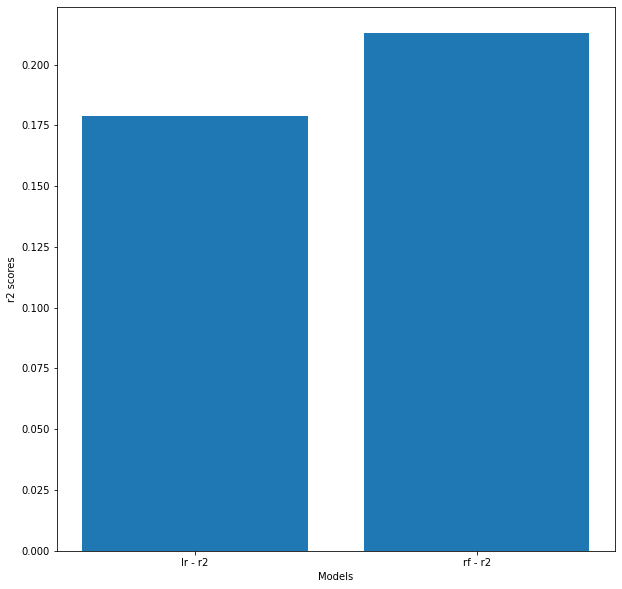

In [ ]:
# Create a dictionary to store the validation scores of the models
validation_scores = {"lr - r2": lr_val, "rf - r2": rf_val}

# Get the categories (model names) from the dictionary
categories = list(validation_scores.keys())

# Get the scores (r2 values) from the dictionary
scores = list(validation_scores.values())

# Create a figure with a size of 10x10 inches
plt.figure(figsize=(10, 10))

# Create a bar plot with the categories as x-axis and the scores as y-axis
plt.bar(categories, scores)

# Set the label for the y-axis
plt.ylabel('r2 scores')

# Set the label for the x-axis
plt.xlabel('Models')

# Display the plot
plt.show()